# 1. quick start

In [1]:
import torch
from torch import nn
import numpy as np
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [2]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

将`Dataset`作为参数传递给`DataLoader`。在我们的数据集上包裹了一个可迭代的，并支持自动批处理、采样、洗牌和多进程数据加载。

定义一个64个批次大小，即可迭代数据加载器中的每个元素将返回一批64个功能和标签。

`DataLoader`支持 map 、迭代对数据进行处理。
* map: 是一个 tensor 到 tensor 的映射, 即: X -> y；
* 迭代: 是一个 list(tensor) 的列表, 即: (X, y);

In [3]:
batch_size = 64

training_loader = DataLoader(dataset=training_data, batch_size=batch_size)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size)

for X, y in training_loader:  # type: (np.ndarray, np.ndarray)
    print(X.shape, y.shape)
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])


## mac torch 加速 mps

In [4]:
torch.backends.mps.is_available(), torch.backends.mps.is_built()

(True, True)

In [5]:
device = torch.device('mps')
# 指定 device
torch.rand((3, 2), device=device)

tensor([[0.5303, 0.8075],
        [0.8885, 0.5211],
        [0.6595, 0.7139]], device='mps:0')

# 2. tensor

`tensor`类似于 NumPy 的`ndarray`s，只是张量可以在GPU或其他硬件加速器上运行。
事实上，`tensor`和 NumPy 数组通常可以共享相同的底层内存，无需复制数据。

## tensor 和 numpy 转换

tensor 转换为 numpy 数组

In [6]:
t = torch.ones(5)
t.numpy()

array([1., 1., 1., 1., 1.], dtype=float32)

numpy 数组 转换为 tensor

In [7]:
n = np.ones(5)
torch.from_numpy(n)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [8]:
shape = (2, 3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.3741, 0.4416, 0.1229],
        [0.0788, 0.1675, 0.7178]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [9]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


# 3. 数据集和数据加载器

PyTorch提供两个数据原型：`torch.utils.data.DataLoader`和`torch.utils.data.Dataset`，允许您使用预加载的数据集以及您自己的数据。
`Dataset` 存储样本及其相应的标签，`DataLoader`将可迭代的包裹在Dataset周围，以便轻松访问样本。

## 加载数据集
加载 FashionMNIST 数据集:

In [10]:

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## 迭代和可视化数据集

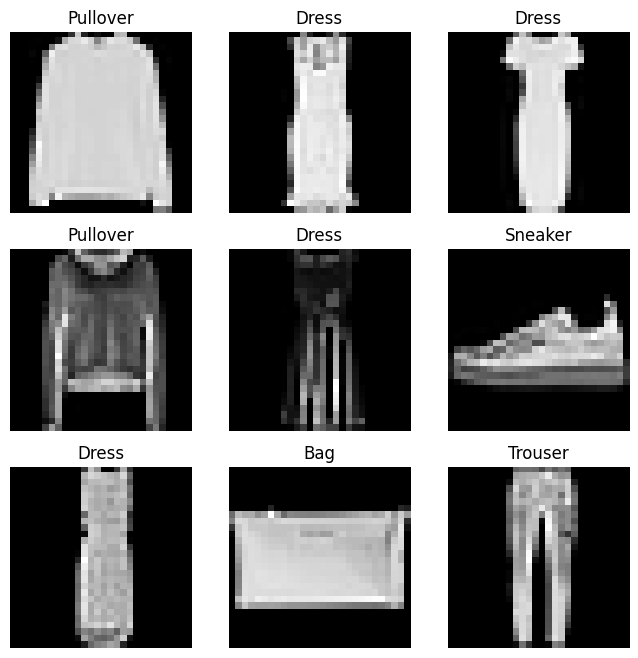

In [11]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
# 抽9幅图片并可视化出来
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, img_label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[img_label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 为您的文件创造自定义数据集

自定义数据集类必须实现三个函数: `__init__`, `__len__`, `__getitem__`。

In [12]:
import os
import pandas as pd
from torchvision.io import read_image


# FashionMNIST 实现
class CustomImageDataset(Dataset):

    def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
        self.image_labels = pd.read_csv(annotation_file)
        self.image_dir = img_dir
        # 样本转换器，一般是一个 callable 就行，相当于编码器：将图片转换为 tensor 等。
        self.transform = transform
        # 目标样本转换器
        self.target_transform = target_transform

    def __len__(self):
        return len(self.image_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.image_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image, label


## 使用 DataLoaders 准备数据进行训练

## 使用 DataLoader 迭代


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


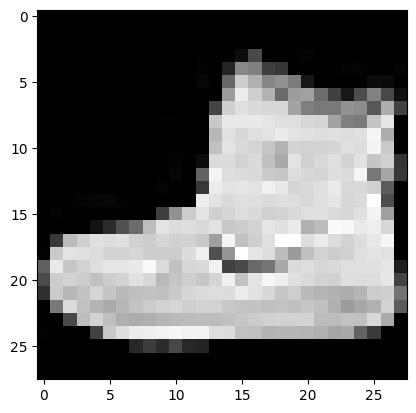

Label: 9


In [13]:
# Display image and label.
train_features, train_labels = next(iter(training_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# 4. Transform

ToTensor、Lambda

In [14]:
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [15]:
for k, v in ds:
    print(k, v)
    break

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

# 5. 建立神经网络

## 获取训练设备

In [16]:
device = ("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else 'cpu')

print(f'使用 {device} 训练')

使用 mps 训练


## 定义类

使用 `nn.Module` 的子类来定义神经网络，并在 `__init__` 中初始化神经网络。每个 `nn.Module` 子类在 `forward` 方法
中实现对输入数据的操作。

In [17]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # 扁平化，默认扁平化为一维
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

可以更改模型的训练设备:

In [18]:
model = NeuralNetwork().to(device)

model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

当我们传递输入数据值，会执行模型的 `forward`，以及一些后台操作，不要直接调用 `model.forward()`。

In [19]:
X = torch.rand(1, 28, 28, device=device)

logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)

y_pred

tensor([2], device='mps:0')

显示模型参数:

In [20]:
for name, param in model.named_parameters():
    print(f'Layer: {name} | Size: {param.size()} | Values: {param[:2]}')

Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[ 0.0099,  0.0019, -0.0162,  ...,  0.0041, -0.0287,  0.0224],
        [ 0.0155, -0.0091,  0.0018,  ...,  0.0221, -0.0304, -0.0231]],
       device='mps:0', grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([-0.0238, -0.0179], device='mps:0', grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[ 0.0084,  0.0077, -0.0311,  ..., -0.0354, -0.0205, -0.0129],
        [ 0.0154, -0.0127,  0.0368,  ..., -0.0152,  0.0007,  0.0058]],
       device='mps:0', grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.2.bias | Size: torch.Size([512]) | Values: tensor([0.0007, 0.0383], device='mps:0', grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.4.weight | Size: torch.Size([10, 512]) | Values: tensor([[-0.0157, -0.0423, -0.0079,  ...,  0.0202,  0.0198, -0.0354],
        [ 0.0210,  0.0439,  0.0353,  ..., -0.0353, -0.

# 6. 自动区分 `torch.autograd`

PyTorch 有一个名为 `torch.autograd` 的内置微分引擎，它支持任何计算图的梯度自动计算。

In [21]:
import torch

x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

In [22]:
z = x @ w + b

loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
loss

tensor(0.1270, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [23]:
z.grad_fn, loss.grad_fn

(<AddBackward0 at 0x13597a7d0>,
 <BinaryCrossEntropyWithLogitsBackward0 at 0x135979f30>)

## 计算梯度

In [24]:
loss.backward()

w.grad, b.grad

(tensor([[0.0496, 0.0488, 0.0199],
         [0.0496, 0.0488, 0.0199],
         [0.0496, 0.0488, 0.0199],
         [0.0496, 0.0488, 0.0199],
         [0.0496, 0.0488, 0.0199]]),
 tensor([0.0496, 0.0488, 0.0199]))

## 禁用梯度跟踪

In [25]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)

True
False


In [26]:
z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

False


# 7. 优化模型参数

* epochs: 迭代次数
* batch_size: 批处理大小，样本数量
* learning_rate: 学习率

In [27]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## 优化循环
每个循环都包含两个重要的参数:
* The Train Loop: 迭代训练数据集，并尝试收敛到最佳参数。
* The Validation/Test Loop: 迭代测试数据集，以检查模型性能是否正在提高。

## 损失函数

常见的损失函数包括用于回归任务的 `nn.MSELoss`（平均平方错误）和用于分类的 `nn.NLLLoss`（负对数可能性）。
`nn.CrossEntropyLoss` 结合了 `nn.LogSoftmax` 和 `nn.NLLLoss`。

我们将模型的输出 logit 传递给 `nn.CrossEntropyLoss`，这将使logit正常化并计算预测误差。

In [28]:
loss_fn = nn.CrossEntropyLoss()

## 优化器

所有优化逻辑都封装在 `optimizer` 对象中。在这里，我们使用SGD优化器；此外，PyTorch中有许多不同的优化器，如 `ADAM` 和 `RMSProp` ，它们更适用于不同类型的模型和数据。


In [29]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 全面实施

In [34]:
from train_helper.senders import TrainMessageSender
from train_helper.env import *

set_train_torch_device('mps')
set_train_message_send(False)
device = get_train_torch_device()

def train_loop(dataloader: DataLoader, model: nn.Module, loss_fn, optimizer: torch.optim.Optimizer):
    size = len(dataloader.dataset)
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)
        # 计算
        pred = model(X)
        # 损失函数
        loss = loss_fn(pred, y)

        # 传播
        loss.backward()
        # 收集梯度，调整参数
        optimizer.step()
        # 梯度归零
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader: DataLoader, model: nn.Module, loss_fn):
    model.eval()

    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size

    print(f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return 100 * correct, test_loss


epochs = 10

model = model.to(device)
sender = TrainMessageSender("Torch Tutorial",
                            "https://qyapi.weixin.qq.com/cgi-bin/webhook/send?key=e2d0bdcf-c9cd-43b2-9e84-6e5f24f4e46d")
for t in range(epochs):
    sender.epoch_start(t + 1, epochs)
    train_loop(training_loader, model, loss_fn, optimizer)
    acc, loss = test_loop(test_loader, model, loss_fn)
    sender.epoch_finish(t + 1, epochs, acc, loss)

print("Done!")

torch 使用 mps 进行训练...
loss: 0.754772  [   64/60000]
loss: 0.828164  [ 6464/60000]
loss: 0.611238  [12864/60000]
loss: 0.812935  [19264/60000]
loss: 0.734064  [25664/60000]
loss: 0.712212  [32064/60000]
loss: 0.814180  [38464/60000]
loss: 0.784997  [44864/60000]
loss: 0.778294  [51264/60000]
loss: 0.733514  [57664/60000]
Test Error: 
 Accuracy: 73.0%, Avg loss: 0.740078 

loss: 0.720152  [   64/60000]
loss: 0.801571  [ 6464/60000]
loss: 0.584964  [12864/60000]
loss: 0.792385  [19264/60000]
loss: 0.715876  [25664/60000]
loss: 0.692128  [32064/60000]
loss: 0.791784  [38464/60000]
loss: 0.770007  [44864/60000]
loss: 0.758558  [51264/60000]
loss: 0.715249  [57664/60000]
Test Error: 
 Accuracy: 74.1%, Avg loss: 0.720313 

loss: 0.690296  [   64/60000]
loss: 0.777336  [ 6464/60000]
loss: 0.562263  [12864/60000]
loss: 0.774563  [19264/60000]
loss: 0.699828  [25664/60000]
loss: 0.675175  [32064/60000]
loss: 0.770830  [38464/60000]
loss: 0.756670  [44864/60000]
loss: 0.741067  [51264/60000]
loss:

KeyboardInterrupt: 

# 8. 保存并加载模型

In [ ]:
import torchvision.models as models

# model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model/model_weights.pth')

In [ ]:
load_model = NeuralNetwork().to('mps')
load_model.load_state_dict(torch.load('model/model_weights.pth'))


In [ ]:
torch.save(model, 'model/model.pth')
load_model = torch.load('model/model.pth')

In [ ]:

load_model.eval()
ret = []
for X, y in test_loader:
    X = X.to('mps')
    y = y.to('mps')
    model_ret = load_model(X)  # type: torch.Tensor
    ret = model_ret.argmax(1)  # type: torch.Tensor
    ret_label = [labels_map[i.item()] for i in ret]
    y_label = [labels_map[i.item()] for i in y.data]
    max = model_ret.max(1)  # type: torch.return_types.max
    ret = np.array([ret_label, y_label, max[0].cpu().detach().numpy()])
    break
ret